<a href="https://colab.research.google.com/github/aisyahdnn/Skripsi/blob/master/ExampleDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

In [12]:
cCitra = os.listdir('/content/drive/My Drive/Dataset/DataTest')
print(cCitra)
print(len(cCitra))

['C37BP2_thinF_IMG_20150620_132440a_cell_108.png', 'C37BP2_thinF_IMG_20150620_132847a_cell_76.png']
2


In [0]:
#SEGMENTASI CANNY DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Actual']])

#Proses Citra Malaria Terinfeksi
for i in range(len(cCitra)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DataTest'+ "/" + cCitra[i])
    edges = cv2.Canny(img,80,30)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,100)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DatasetTest.csv", x, fmt='%s',delimiter=',' )

In [19]:
#LOAD DATASET

datasettrain = pd.read_csv('/content/drive/My Drive/Dataset/DatasetTrain.csv')
datasettest = pd.read_csv('/content/drive/My Drive/Dataset/DatasetTest.csv')

print(datasettrain)
print(datasettest)

           H1        H2            H3  ...            H6            H7  Actual
0    0.014561  0.000029  3.632756e-08  ...  6.353503e-12  4.330040e-16     1.0
1    0.026547  0.000170  1.138837e-06  ...  3.063264e-08 -3.005370e-12     1.0
2    0.028276  0.000027  3.460565e-07  ...  5.265115e-09 -6.515198e-13     1.0
3    0.024422  0.000022  1.157081e-07  ...  3.187912e-10 -6.131459e-14     1.0
4    0.019319  0.000002  1.072033e-07  ...  7.293107e-10  9.598053e-14     1.0
..        ...       ...           ...  ...           ...           ...     ...
995  0.012752  0.000043  2.179522e-07  ...  1.653583e-11 -1.029641e-16     1.0
996  0.018757  0.000024  4.702513e-09  ...  6.308761e-09  1.009837e-13     1.0
997  0.018091  0.000002  7.336674e-08  ...  3.725437e-10  9.225196e-14     1.0
998  0.019440  0.000045  1.845630e-07  ...  2.614035e-09 -1.054526e-13     1.0
999  0.016831  0.000017  1.238836e-07  ... -2.620264e-12 -3.714716e-17     1.0

[1000 rows x 8 columns]
         H1            H2  

In [0]:
#split dataset

x_train = datasettrain.iloc[:, 0:7] 
y_train = datasettrain.iloc[:, 7]
 
x_test = datasettest.iloc[:, 0:7] 
y_test = datasettest.iloc[:, 7]

1.0    998
Name: Actual, dtype: int64
1.0    2
Name: Actual, dtype: int64
/n
/n


Text(0.5, 1.0, 'TESTING')

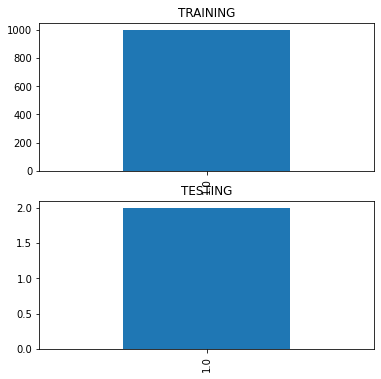

In [0]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(6,6)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [0]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[ 2.89946232e-01,  5.43691515e-01,  5.89247858e-01, ...,
         7.52526554e-01,  9.96228294e-01,  3.76260490e-01],
       [ 3.39672618e-01, -6.38865231e-01, -1.32583350e-01, ...,
         4.44594860e-02, -3.20290739e-01, -4.37605065e-02],
       [-8.72205305e-01, -6.52548980e-01, -5.14877150e-01, ...,
         4.50083897e-02, -3.06187582e-01,  4.55191950e-02],
       ...,
       [-3.11814387e-01, -2.46550278e-01, -5.94127244e-01, ...,
         4.69318085e-02, -3.95015388e-01,  2.78872773e-04],
       [-1.15897272e+00,  1.26539876e-01, -2.51486768e-01, ...,
         8.06063654e-02, -9.85359931e-02, -6.87721642e-02],
       [-5.44991556e-01, -5.84561826e-01, -5.32501236e-01, ...,
         5.21338519e-02, -3.31718880e-01, -2.38815596e-02]])

In [0]:
math.sqrt(len(y_test))

1.4142135623730951

In [0]:
#choose method knn and fitting
classifier = KNeighborsClassifier(n_neighbors=2,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:
#proses testing

#hasil prediksi/testing dismpn ke (y_pred)
y_pred = classifier.predict(x_test)
y_pred

array([1., 1.])

In [0]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred))
print("recall :" , recall_score(y_test, y_pred))
print("F-Measure :" , f1_score(y_test, y_pred))

[[2]]
Akurasi : 1.0
presisi : 1.0
recall : 1.0
F-Measure : 1.0
